##  Import libraries and dataset
Let’s import the libraries and the dataset from Kaggle, which contains the tweets collected using the Twitter API from July 2020. A filter was applied: only the tweets with #covid19 were extracted.

In [14]:
import numpy as np
import pandas as pd 
import re

# read the data covid19_tweets.csv
df = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [15]:
#show me the text column


0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

## Remove Links
he first operation is to remove all the links since they don’t have any predicting significance:

In [16]:
# Your code here
def remove_links(text):

# Show me an example


text          Some Unfortunate News\n https://t.co/VpKFmdkDB...
clean_text    Some Unfortunate News\n  \nAwww well hopefully...
Name: 94807, dtype: object

From the row extracted, we can easily see the difference between the original text and the resulting text after the cleaning.

 

In [17]:
df.iloc[94807]

user_name                                  Odinson (ThrivingQuill)☕🍷🔥
user_location                                                     NaN
user_description    Fiction Erotica writer, tarot reader,content c...
user_created                                      2019-03-16 06:13:42
user_followers                                                     13
user_friends                                                       51
user_favourites                                                   520
user_verified                                                   False
date                                              2020-08-09 05:48:45
text                Some Unfortunate News\n https://t.co/VpKFmdkDB...
hashtags               ['COVID19', 'StephanieMeyer', 'twilightevent']
source                                            Twitter for Android
is_retweet                                                      False
clean_text          Some Unfortunate News\n  \nAwww well hopefully...
Name: 94807, dtype: 

## Remove punctuations
Characters like “?”, “. “ and “,” need to be deleted. This is possible using the sub() function of the re module. It replaces a regular expression with white space.

You are probably wondering what is a regular expression. It’s used to specify a set of strings that matches it. You can find other information about the re library on the w3school website.

In [18]:
def remove_punctuations(text):
    

We compare again the tweets with the corresponding cleaned texts. We don’t see any more punctuations.

In [19]:
df[["text","clean_text"]]

,text,clean_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey Yankees YankeesPR and MLB wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,diane3443 wdunlap realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,brookbanktv The one gift COVID19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July Media Bulletin on Novel CoronaVirus...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks IamOhmai for nominating me for the WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 The year of insanity Lol COVID19
179105,@CTVNews A powerful painting by Juan Lucena. I...,CTVNews A powerful painting by Juan Lucena I...
179106,"More than 1,200 students test positive for #CO...",More than 1 200 students test positive for CO...


## Remove numbers
We also need to remove numerical characters in the text. They don’t use information by themselves. These characters can be easily deleted using the replace function.

In [20]:
def remove_numbers(text):


,text,clean_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey Yankees YankeesPR and MLB wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,diane wdunlap realDonaldTrump Trump never o...
3,@brookbanktv The one gift #COVID19 has give me...,brookbanktv The one gift COVID has give me i...
4,25 July : Media Bulletin on Novel #CoronaVirus...,July Media Bulletin on Novel CoronaVirusUp...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks IamOhmai for nominating me for the WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,The year of insanity Lol COVID
179105,@CTVNews A powerful painting by Juan Lucena. I...,CTVNews A powerful painting by Juan Lucena I...
179106,"More than 1,200 students test positive for #CO...",More than students test positive for COVID ...


## Remove emojis

The emojis are removed since they can’t be analyzed. The apply function takes the deEmojify function, which is applied to every row of the data frame. In the function, we first encode the string using the ASCII encoding, and then we decode it. In this way, we are able to delete the emojis.

In [21]:
import emoji

def remove_emojis(text):


,text,clean_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey Yankees YankeesPR and MLB wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,diane wdunlap realDonaldTrump Trump never o...
3,@brookbanktv The one gift #COVID19 has give me...,brookbanktv The one gift COVID has give me i...
4,25 July : Media Bulletin on Novel #CoronaVirus...,July Media Bulletin on Novel CoronaVirusUp...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks IamOhmai for nominating me for the WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,The year of insanity Lol COVID
179105,@CTVNews A powerful painting by Juan Lucena. I...,CTVNews A powerful painting by Juan Lucena I...
179106,"More than 1,200 students test positive for #CO...",More than students test positive for COVID ...


## Remove Stop words

The stop words are terms used for the sake of correct sentence formations but don’t have any significant insights. Examples of these words are “why”, “what”,” how”. So, these words are more noisy than informative. For this reason, we need to remove them. Luckily, we don’t need to specify manually the stop words, but they are already provided by the nltk module.

In [22]:
import nltk
from nltk.corpus import stopwords

#nltk.download('stopwords')

stop = set(stopwords.words('english'))
print(stop)



{'hadn', 'which', 'theirs', 'what', "needn't", "isn't", 'other', 'that', 'hasn', 'it', 'all', 'any', 'here', 'how', 'again', 'ain', 'themselves', 'off', 'yourselves', 'under', 'wouldn', 're', "couldn't", 'mightn', 'doing', 's', 'before', 'yours', 'his', "should've", 'himself', 'both', 'than', 'this', 'couldn', 'why', "haven't", 'm', 'same', 'did', 'does', 'had', 'with', 'further', 'ours', "you'd", 'is', 'needn', 'until', 'more', 'not', "mightn't", 'are', 'down', 'her', 'having', 'who', "you'll", 'we', 'and', 'your', 'has', 'll', 'each', 'against', 'she', 'the', 'once', 'these', 'they', 'when', 'doesn', 'own', 'will', 'shan', "she's", "shouldn't", 'i', 'ma', 'at', 'nor', "wouldn't", 'where', 'be', 'he', 'been', 'but', 'up', 'to', 'no', 'aren', 'only', 'very', 'whom', 'me', 'myself', 'out', 'don', 'won', "didn't", "it's", 'there', 'then', "wasn't", 'didn', 'am', "hadn't", 'by', 'so', 'were', "weren't", 'over', 'herself', 'can', 'shouldn', 'our', 'him', 'haven', 'or', 'because', "aren't",

In [23]:
def remove_stopwords(text):


,text,clean_text
0,If I smelled the scent of hand sanitizers toda...,smelled scent hand sanitizers today someone pa...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey Yankees YankeesPR MLB made sense players p...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,diane wdunlap realDonaldTrump Trump never clai...
3,@brookbanktv The one gift #COVID19 has give me...,brookbanktv one gift COVID give appreciation s...
4,25 July : Media Bulletin on Novel #CoronaVirus...,July Media Bulletin Novel CoronaVirusUpdates C...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks IamOhmai nominating WearAMask challenge...
179104,2020! The year of insanity! Lol! #COVID19 http...,year insanity Lol COVID
179105,@CTVNews A powerful painting by Juan Lucena. I...,CTVNews powerful painting Juan Lucena tribute ...
179106,"More than 1,200 students test positive for #CO...",students test positive COVID major university ...


## Tokenizers
We simply split the text into tokens. In other words, the string is converted into a list, where each element corresponds to a word. The module nltk provides tokenize function to tokenize the tweets.

In [25]:
import nltk
#nltk.download('punkt')

from nltk.tokenize import word_tokenize

def tokenize_text(text):


,text,clean_text
0,If I smelled the scent of hand sanitizers toda...,"[smelled, scent, hand, sanitizers, today, some..."
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,"[Hey, Yankees, YankeesPR, MLB, made, sense, pl..."
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,"[diane, wdunlap, realDonaldTrump, Trump, never..."
3,@brookbanktv The one gift #COVID19 has give me...,"[brookbanktv, one, gift, COVID, give, apprecia..."
4,25 July : Media Bulletin on Novel #CoronaVirus...,"[July, Media, Bulletin, Novel, CoronaVirusUpda..."
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,"[Thanks, IamOhmai, nominating, WearAMask, chal..."
179104,2020! The year of insanity! Lol! #COVID19 http...,"[year, insanity, Lol, COVID]"
179105,@CTVNews A powerful painting by Juan Lucena. I...,"[CTVNews, powerful, painting, Juan, Lucena, tr..."
179106,"More than 1,200 students test positive for #CO...","[students, test, positive, COVID, major, unive..."


## Normillze Words
The last step consists in normalizing the text. What does it mean? We want to convert a word to its base form. For example, playing, plays and play can seem different to the computer, but they are the same thing. We need to produce the root forms of these words. The nltk module plays a relevant role this time too. It provides the WordNetLemmatizer function, which looks for the lemmas of the words using a database, called WordNet.

In [28]:
from nltk.stem import WordNetLemmatizer

#nltk.download('wordnet')

lemmatiser = WordNetLemmatizer()
df["clean_text"] = df["clean_text"].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df[["text","clean_text"]]

,text,clean_text
0,If I smelled the scent of hand sanitizers toda...,"[smell, scent, hand, sanitizers, today, someon..."
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,"[Hey, Yankees, YankeesPR, MLB, make, sense, pl..."
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,"[diane, wdunlap, realDonaldTrump, Trump, never..."
3,@brookbanktv The one gift #COVID19 has give me...,"[brookbanktv, one, gift, COVID, give, apprecia..."
4,25 July : Media Bulletin on Novel #CoronaVirus...,"[July, Media, Bulletin, Novel, CoronaVirusUpda..."
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,"[Thanks, IamOhmai, nominate, WearAMask, challe..."
179104,2020! The year of insanity! Lol! #COVID19 http...,"[year, insanity, Lol, COVID]"
179105,@CTVNews A powerful painting by Juan Lucena. I...,"[CTVNews, powerful, paint, Juan, Lucena, tribu..."
179106,"More than 1,200 students test positive for #CO...","[student, test, positive, COVID, major, univer..."


From the output, we can check the final text. Words, like “smelled” and “nominating”, were transformed into their corresponding root forms, “smell” and “nominate”.

# EDA

In [30]:
df = pd.read_csv('./covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Missing Values

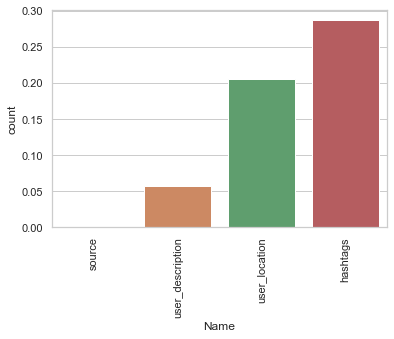

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

plot_missing_values(df)

## Frequency of users tweeting about Covid

c:\Users\ziana-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


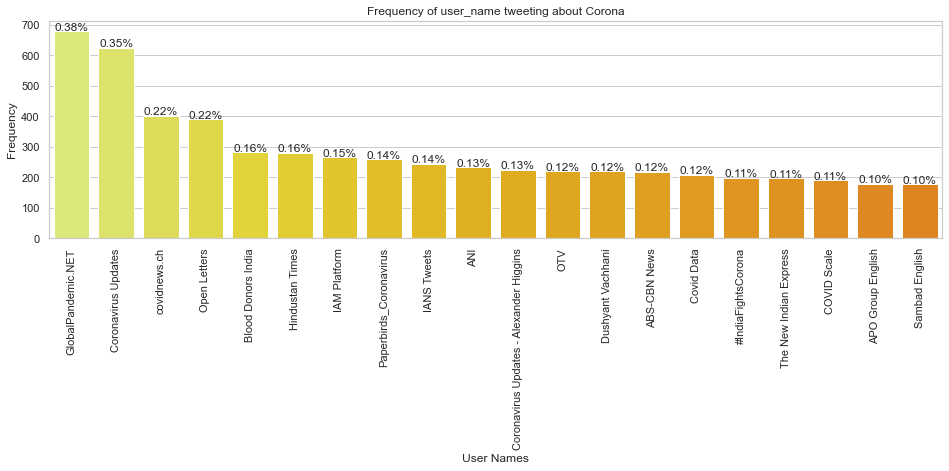

In [32]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

plot_frequency_charts(df, 'user_name', 'User Names','Wistia')

## Frequency of locations tweeting about Covid

c:\Users\ziana-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


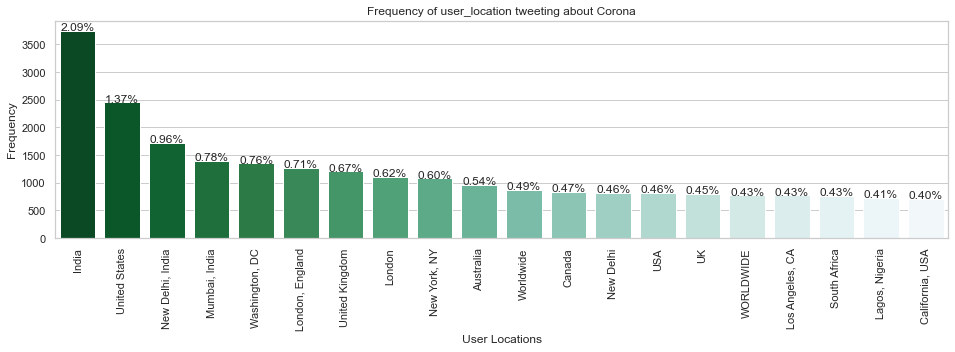

In [33]:
plot_frequency_charts(df, 'user_location', 'User Locations', 'BuGn_r')

## Visualizing top 30 words location wise

In [34]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [35]:
from collections import Counter

def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = df.loc[df.user_location==location]
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='count', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical')

In [38]:
from wordcloud import WordCloud, STOPWORDS



def draw_word_cloud(df, location, title):
    loc_df = df.loc[df.user_location==location]
    loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()
    

## Top words in India

c:\Users\ziana-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


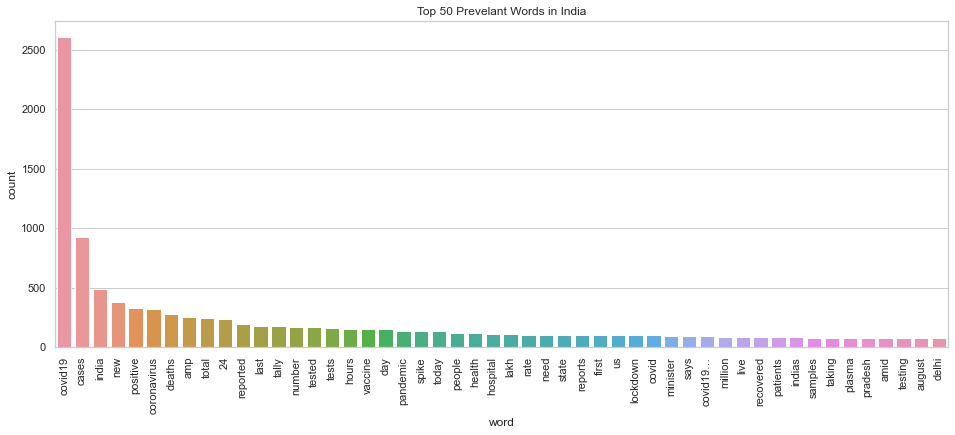

In [39]:
draw_bar_graph_for_text_visualization(df, 'India')

## Top words in United Kingdom

c:\Users\ziana-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


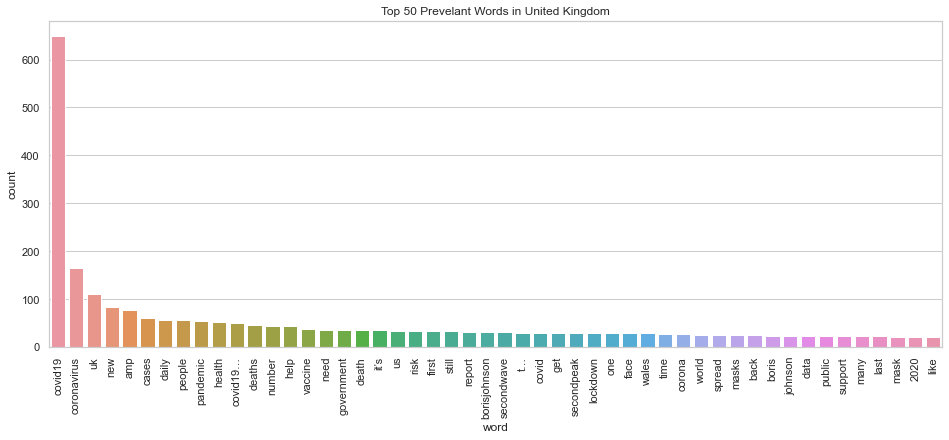

In [40]:
draw_bar_graph_for_text_visualization(df, 'United Kingdom')

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
4480,Voice Britannia,united kingdom,Trustable news and opinions from outside the M...,2020-05-17 22:52:56,1988,287,1408,False,2020-07-25 09:40:00,LOCAL #LOCKDOWN announced in Blackburn with Da...,['LOCKDOWN'],TweetDeck,False
5949,Voice Britannia,united kingdom,Trustable news and opinions from outside the M...,2020-05-17 22:52:56,1988,287,1408,False,2020-07-25 08:40:00,"In part 1 of a 2-part series, Mental-Health (a...",['VB'],TweetDeck,False
48528,Voice Britannia,united kingdom,Trustable news and opinions from outside the M...,2020-05-17 22:52:56,2929,301,1830,False,2020-07-31 18:06:40,The inconsistencies of @Channel4News are reall...,NaN,Twitter Web App,False
68847,Voice Britannia,united kingdom,Trustable news and opinions from outside the M...,2020-05-17 22:52:56,3175,310,2031,False,2020-08-04 07:00:00,#Covid19 Reproduction rate now above 1.0 in MO...,"['Covid19', 'secondwave']",TweetDeck,False
69378,Voice Britannia,united kingdom,Trustable news and opinions from outside the M...,2020-05-17 22:52:56,3175,310,2031,False,2020-08-04 06:40:00,National Crime Agency document details ‘report...,['COVID19'],TweetDeck,False
71105,Voice Britannia,united kingdom,Trustable news and opinions from outside the M...,2020-05-17 22:52:56,3175,310,2031,False,2020-08-04 05:30:00,Boris Johnson caught lying again – This time o...,NaN,TweetDeck,False
104791,Born 4 Success,united kingdom,"lifestyle Coach-Mental Health Nurse, Cognitive...",2020-06-01 15:07:09,465,614,4212,False,2020-08-11 09:29:38,I hope you find this article helpful. #COVID19...,"['COVID19', 'covid', 'Covid19UK', 'Covid_19', ...",Twitter for iPhone,False
106015,Born 4 Success,united kingdom,"lifestyle Coach-Mental Health Nurse, Cognitive...",2020-06-01 15:07:09,465,614,4212,False,2020-08-11 08:59:26,I hope 🤞 everyone finds this blog helpful? Inw...,"['cantsleep', 'covid', 'COVID19']",Twitter for iPhone,False
108984,Voice Britannia,united kingdom,"Condensed, easy to read news and opinions from...",2020-05-17 22:52:56,3219,329,2433,False,2020-08-11 07:30:00,Boris Johnson warns ‘France days from being ad...,NaN,TweetDeck,False
112448,Born 4 Success,united kingdom,"lifestyle Coach-Mental Health Nurse, Cognitive...",2020-06-01 15:07:09,470,621,4212,False,2020-08-12 08:29:41,We are Dedicated To Your Health Well Being &am...,['toohottosleep'],Twitter for iPhone,False
